In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
trades = pd.read_csv('md/trades.csv')
# ticker = pd.read_csv('md/ticker.csv')
book = pd.read_csv('md/book.csv')
target = pd.read_csv('md/target.csv')

In [12]:
trades

,local_ts,seq,remote_ts,remote_ts2,price,amount,side
0,1679443200000453376,3467110982,1679443199997,1679443199993,28091.1,0.001,S
1,1679443200001720832,3467110983,1679443199997,1679443199993,28091.1,0.003,S
2,1679443200022432256,3467110984,1679443200001,1679443199996,28091.1,0.007,S
3,1679443200022432406,3467110985,1679443200001,1679443199996,28091.1,0.001,S
4,1679443200022597888,3467110986,1679443200001,1679443199996,28091.1,0.004,S
...,...,...,...,...,...,...,...
20548907,1679702399575119616,3487666433,1679702399571,1679702399567,27439.0,0.031,B
20548908,1679702399737273600,3487666434,1679702399733,1679702399730,27438.9,0.001,S
20548909,1679702399815981568,3487666435,1679702399812,1679702399808,27438.9,0.041,S
20548910,1679702399991836160,3487666436,1679702399988,1679702399984,27438.9,0.051,S


In [15]:
book

,exchange,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,...,bids[22].price,bids[22].amount,asks[23].price,asks[23].amount,bids[23].price,bids[23].amount,asks[24].price,asks[24].amount,bids[24].price,bids[24].amount
0,binance-futures,BTCUSDT,1679443200138000000,1679443200485131264,28091.2,16.183,28091.1,0.001,28091.3,7.874,...,28087.8,0.006,28093.6,0.052,28087.7,0.036,28093.7,0.001,28087.6,0.002
1,binance-futures,BTCUSDT,1679443202062000000,1679443202065465600,28090.9,6.995,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
2,binance-futures,BTCUSDT,1679443202688000000,1679443202691394048,28090.9,7.005,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
3,binance-futures,BTCUSDT,1679443202809000000,1679443202812150528,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
4,binance-futures,BTCUSDT,1679443203186000000,1679443203188767744,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403486,binance-futures,BTCUSDT,1679702399829000000,1679702399832702464,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,27435.8,0.389,27442.4,0.001,27435.7,0.008,27442.5,0.062,27435.6,0.022
6403487,binance-futures,BTCUSDT,1679702399861000000,1679702399864089088,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,27435.8,0.389,27442.4,0.001,27435.7,0.008,27442.5,0.062,27435.6,0.022
6403488,binance-futures,BTCUSDT,1679702399893000000,1679702399896144640,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,27435.8,0.389,27442.4,0.001,27435.7,0.008,27442.5,0.062,27435.6,0.022
6403489,binance-futures,BTCUSDT,1679702399925000000,1679702399928461568,27439.0,3.012,27438.9,6.982,27439.3,0.001,...,27435.8,0.389,27442.4,0.001,27435.7,0.008,27442.5,0.062,27435.6,0.022


Orderbook Imbalances:

In [8]:
book['IMB naive'] = 0
book['IMB naive'] = (book['bids[0].amount'] - book['asks[0].amount']) / (book['bids[0].amount'] + book['asks[0].amount'])

Robust Imbalance considering prices:

In [12]:
book['ask_average'] = 0
book['bid_average'] = 0
book['IMB_ask_average'] = 0
book['IMB_bid_average'] = 0

In [20]:
book['ask_average'] = book[[f'asks[{i}].price' for i in range(25)]].mean(axis=1)
book['bid_average'] = book[[f'bids[{i}].price' for i in range(25)]].mean(axis=1)
### как-то странно что ask_average считает за 3.5 сек, а bid_average за 28 сек
book['IMB_ask'] = (book['ask_average'] / book['asks[0].price'] - 1) * 10000
book['IMB_bid'] = (book['bids[0].price'] / book['bid_average']  - 1) * 10000

In [21]:
book

,exchange,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,...,asks[24].amount,bids[24].price,bids[24].amount,IMB naive,ask_average,bid_average,IMB_ask_average,IMB_bid_average,IMB_ask,IMB_bid
0,binance-futures,BTCUSDT,1679443200138000000,1679443200485131264,28091.2,16.183,28091.1,0.001,28091.3,7.874,...,0.001,28087.6,0.002,-0.999876,28092.428,28089.392,0,0,0.437148,0.608059
1,binance-futures,BTCUSDT,1679443202062000000,1679443202065465600,28090.9,6.995,28090.8,0.002,28091.0,0.735,...,0.401,28087.4,0.001,-0.999428,28092.212,28089.104,0,0,0.467055,0.603793
2,binance-futures,BTCUSDT,1679443202688000000,1679443202691394048,28090.9,7.005,28090.8,0.002,28091.0,0.735,...,0.401,28087.4,0.001,-0.999429,28092.212,28089.104,0,0,0.467055,0.603793
3,binance-futures,BTCUSDT,1679443202809000000,1679443202812150528,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,0.401,28087.4,0.001,-0.999419,28092.212,28089.104,0,0,0.467055,0.603793
4,binance-futures,BTCUSDT,1679443203186000000,1679443203188767744,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,0.401,28087.4,0.001,-0.999419,28092.212,28089.104,0,0,0.467055,0.603793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403486,binance-futures,BTCUSDT,1679702399829000000,1679702399832702464,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,0.062,27435.6,0.022,0.396695,27440.948,27437.120,0,0,0.709938,0.648756
6403487,binance-futures,BTCUSDT,1679702399861000000,1679702399864089088,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,0.062,27435.6,0.022,0.396695,27440.948,27437.120,0,0,0.709938,0.648756
6403488,binance-futures,BTCUSDT,1679702399893000000,1679702399896144640,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,0.062,27435.6,0.022,0.396695,27440.948,27437.120,0,0,0.709938,0.648756
6403489,binance-futures,BTCUSDT,1679702399925000000,1679702399928461568,27439.0,3.012,27438.9,6.982,27439.3,0.001,...,0.062,27435.6,0.022,0.397238,27440.948,27437.120,0,0,0.709938,0.648756


Trade Imbalances

In [34]:
book['asks_amount_sum'] = book[[f'asks[{i}].amount' for i in range(25)]].sum(axis=1)
book['bids_amount_sum'] = book[[f'bids[{i}].amount' for i in range(25)]].sum(axis=1)
book['TFI'] = book['bids_amount_sum'] - book['asks_amount_sum']

In [35]:
book

,exchange,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,...,IMB naive,ask_average,bid_average,IMB_ask_average,IMB_bid_average,IMB_ask,IMB_bid,asks_amount_sum,bids_amount_sum,TFI
0,binance-futures,BTCUSDT,1679443200138000000,1679443200485131264,28091.2,16.183,28091.1,0.001,28091.3,7.874,...,-0.999876,28092.428,28089.392,0,0,0.437148,0.608059,35.606,0.520,-35.086
1,binance-futures,BTCUSDT,1679443202062000000,1679443202065465600,28090.9,6.995,28090.8,0.002,28091.0,0.735,...,-0.999428,28092.212,28089.104,0,0,0.467055,0.603793,42.733,0.616,-42.117
2,binance-futures,BTCUSDT,1679443202688000000,1679443202691394048,28090.9,7.005,28090.8,0.002,28091.0,0.735,...,-0.999429,28092.212,28089.104,0,0,0.467055,0.603793,42.743,0.616,-42.127
3,binance-futures,BTCUSDT,1679443202809000000,1679443202812150528,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,-0.999419,28092.212,28089.104,0,0,0.467055,0.603793,42.623,0.616,-42.007
4,binance-futures,BTCUSDT,1679443203186000000,1679443203188767744,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,-0.999419,28092.212,28089.104,0,0,0.467055,0.603793,42.732,0.616,-42.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403486,binance-futures,BTCUSDT,1679702399829000000,1679702399832702464,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,0.396695,27440.948,27437.120,0,0,0.709938,0.648756,8.780,9.380,0.600
6403487,binance-futures,BTCUSDT,1679702399861000000,1679702399864089088,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,0.396695,27440.948,27437.120,0,0,0.709938,0.648756,8.779,9.380,0.601
6403488,binance-futures,BTCUSDT,1679702399893000000,1679702399896144640,27439.0,3.012,27438.9,6.973,27439.3,0.001,...,0.396695,27440.948,27437.120,0,0,0.709938,0.648756,8.725,9.380,0.655
6403489,binance-futures,BTCUSDT,1679702399925000000,1679702399928461568,27439.0,3.012,27438.9,6.982,27439.3,0.001,...,0.397238,27440.948,27437.120,0,0,0.709938,0.648756,8.725,9.456,0.731


Past Returns

In [24]:
trades['PRET'] = trades['price'].pct_change(fill_method='ffill') * 10000

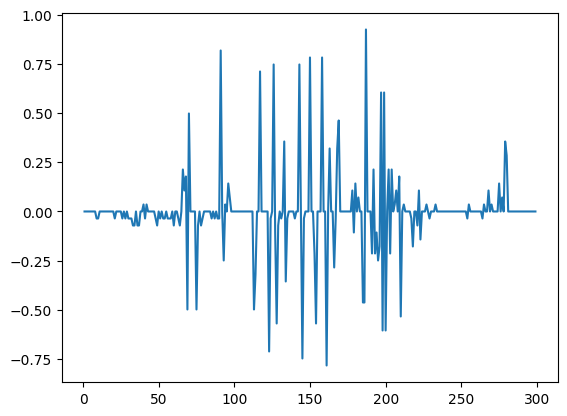

In [30]:
plt.plot(trades['PRET'][:300])

Mean Divergence

In [36]:
trades_spot = pd.read_csv('md/trades.spot.csv')

In [57]:
trades['local_ts'] = pd.to_datetime(trades['local_ts'])
trades_spot['local_ts'] = pd.to_datetime(trades_spot['local_ts'])
trades.rename(columns = {'price': 'price_futures'}, inplace = True)
trades_spot.rename(columns = {'price': 'price_spot'}, inplace = True)

In [58]:
trades_futures_spot = pd.merge_asof(trades, trades_spot, on='local_ts')

In [59]:
trades_futures_spot

,local_ts,seq_x,remote_ts_x,remote_ts2_x,price_futures,amount_x,side_x,PRET,seq_y,remote_ts_y,remote_ts2_y,price_spot,amount_y,side_y
0,2023-03-22 00:00:00.000453376,3467110982,1679443199997,1679443199993,28091.1,0.001,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-22 00:00:00.001720832,3467110983,1679443199997,1679443199993,28091.1,0.003,S,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-22 00:00:00.022432256,3467110984,1679443200001,1679443199996,28091.1,0.007,S,0.000000,3.049132e+09,1.679443e+12,1.679443e+12,28105.80,0.00209,S
3,2023-03-22 00:00:00.022432406,3467110985,1679443200001,1679443199996,28091.1,0.001,S,0.000000,3.049132e+09,1.679443e+12,1.679443e+12,28105.80,0.00209,S
4,2023-03-22 00:00:00.022597888,3467110986,1679443200001,1679443199996,28091.1,0.004,S,0.000000,3.049132e+09,1.679443e+12,1.679443e+12,28105.80,0.00209,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20548907,2023-03-24 23:59:59.575119616,3487666433,1679702399571,1679702399567,27439.0,0.031,B,0.000000,3.056392e+09,1.679702e+12,1.679702e+12,27454.21,0.00085,B
20548908,2023-03-24 23:59:59.737273600,3487666434,1679702399733,1679702399730,27438.9,0.001,S,-0.036444,3.056392e+09,1.679702e+12,1.679702e+12,27454.47,0.00067,B
20548909,2023-03-24 23:59:59.815981568,3487666435,1679702399812,1679702399808,27438.9,0.041,S,0.000000,3.056392e+09,1.679702e+12,1.679702e+12,27454.47,0.00067,B
20548910,2023-03-24 23:59:59.991836160,3487666436,1679702399988,1679702399984,27438.9,0.051,S,0.000000,3.056392e+09,1.679702e+12,1.679702e+12,27454.47,0.00078,B


In [60]:
trades_futures_spot['d'] = trades_futures_spot['price_futures'] / trades_futures_spot['price_spot'] - 1
trades_futures_spot.set_index(trades_futures_spot['local_ts'], drop=True, inplace=True)
trades_futures_spot['window'] = trades_futures_spot['d'].rolling('10s').mean()
DIV = trades_futures_spot['d'] - trades_futures_spot['window']

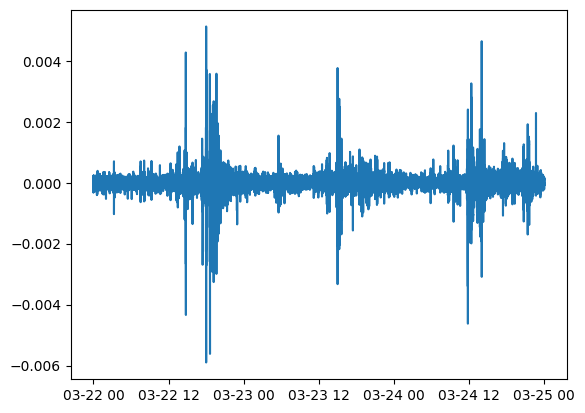

In [62]:
plt.plot(DIV)

Accumulation Distribution Line

In [3]:
book['market_mid_price'] = (book['asks[0].price'] + book['bids[0].price']) / 2

Окно размером len=10 дает где-то 4 млн null значений из-за знаминателя. окно len=50 2.5млн, окно len=100 - 1.5млн.

In [26]:
# close_price = book['market_mid_price'].rolling(100).agg(lambda rows: rows.iloc[-1])
close_price = book['market_mid_price'].iloc[100:]
close_price = pd.concat([pd.Series([np.nan for i in range(100)]), close_price])
lowest_price = book['market_mid_price'].rolling(100).min()
highest_price = book['market_mid_price'].rolling(100).max()

In [27]:
money_flow_multiplier = ((close_price - lowest_price) - (highest_price - close_price)) / (highest_price - lowest_price)
ADL = money_flow_multiplier.cumsum()

In [28]:
money_flow_multiplier.isnull().sum()

1487968

Chande Momentum oscillator

In [20]:
updays = (trades['price'] / (trades['price'].shift(1)) > 1) * 1
downdays = (trades['price'] / (trades['price'].shift(1)) < 1) * 1
zerodays = (trades['price'] / (trades['price'].shift(1)) == 1) * 1
    
CL_up = (trades['price'] - (trades['price'].shift(1))) * updays
CL_down = -(trades['price'] - (trades['price'].shift(1))) * downdays

Su = CL_up.rolling(10).sum()
Sd = CL_down.rolling(10).sum()

CMO = 100 * (Su - Sd)/(Su + Sd)

Momentum

In [15]:
MOM = trades['price'] - trades['price'].shift(1)
MOM

0           NaN
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
20548907    0.0
20548908   -0.1
20548909    0.0
20548910    0.0
20548911    0.0
Name: price, Length: 20548912, dtype: float64

Rate of Change

In [14]:
ROC = (trades['price'] - trades['price'].shift(10)) / trades['price'].shift(10) * 100
ROC

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
              ...   
20548907    0.000364
20548908    0.000000
20548909    0.000000
20548910    0.000000
20548911    0.000000
Name: price, Length: 20548912, dtype: float64

Relative Strength Index

In [18]:
CL = trades['price'] - trades['price'].shift(1)

updays = (CL > 0) * 1
downdays = (CL < 0) * 1
zerodays = (CL == 0) * 1

CL_up = CL * updays
CL_down = -CL * downdays

AG = CL_up.rolling(10).sum()
AL = CL_down.rolling(10).sum()

Relative_strength = AG/AL

RSI = 100 - 100/(1 + Relative_strength)
RSI[:100]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
95    70.588235
96    73.684211
97    76.923077
98    76.923077
99    78.947368
Name: price, Length: 100, dtype: float64

Order book imbalance

In [ ]:
depth = 5
ask_volumes = book[[f'asks[{i}].amount' for i in range(depth)]]
bid_volumes = book[[f'bids[{i}].amount' for i in range(depth)]]
    
Va = ask_volumes.mean(axis = 1)
Vb = bid_volumes.mean(axis = 1)    
    
OBI = (Vb-Va)/(Va+Vb)

Autocorrelation

In [ ]:
lag = 10
window = 10

shifted = trades['price'].shift(lag)

std1 = trades['price'].rolling(window).std()
std2 = shifted.rolling(window).std()

cov = (shifted * trades['price']).rolling(window).mean() - shifted.rolling(window).mean() * trades['price'].rolling(window).mean()
correlation = cov/(std1*std2)

correlation[correlation == np.inf] = np.nan

In [19]:
def Realized_Volatility(md, depth):
    delta = pd.DataFrame({'delta' : md['mid_price']-md['mid_price'].shift(1)})
    delta.fillna(0, inplace=True)
    delta = delta*delta
    tmp = delta.rolling(depth).sum()
    tmp.fillna(0, inplace=True)
    return tmp

In [29]:
high_sum = trades['price'].rolling(10).sum()
low_sum = trades['price'].shift(1).rolling(10).sum()
(high_sum - low_sum) /(high_sum + low_sum).cumsum()

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                ...     
20548907    8.719091e-15
20548908    0.000000e+00
20548909    5.075179e-24
20548910   -5.075178e-24
20548911    0.000000e+00
Name: price, Length: 20548912, dtype: float64

In [30]:
high_sum = trades['price'].rolling(10).sum()
low_sum = trades['price'].shift(1).rolling(10).sum()
(high_sum - low_sum) /(high_sum + low_sum).cumsum()

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                ...     
20548907    8.719091e-15
20548908    0.000000e+00
20548909    5.075179e-24
20548910   -5.075178e-24
20548911    0.000000e+00
Name: price, Length: 20548912, dtype: float64

In [7]:
!ls ../

#include <iostream>.cpp
09.2.HW2
1.txt
2.txt
3.txt
3c.c
4 (2).c
Applications
CLionProjects
CONT_2012_Price_dynamics_in_a_Markovian_limit_order_market.pdf
CV
Caos
ClickHouse
Desktop
Documents
Downloads
GUILBAUD_2011_Optimal_high_frequency_trading_with_limit_and_market.pdf
HFT
HSE Lab (linear regression) 20-21 Манукян Айк БПМИ2012.ipynb
HSE lab (SVD) Айк Манукян БПМИ2012.ipynb
Image-1.pdf
Library
Manukyan077
Movies
Music
Pictures
Public
PycharmProjects
Term-Paper-LaTeX-Template
Term-Paper-LaTeX-Template.zip
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
VS code
VirtualBox VMs
Vs code projects
a.cpp
a.ipynb
a.out
a.py
a.txt
algorithmic-trading-python
armen cv
client
cmf_hft_mm
codeforces
column-oriented-b992c529fa4085b63b57452fbbeb27ba.webp
concurrency
concurrency — копия
cpp
cpp-advanced-hse
credit scoring 
credit scoring  — копия
credit-derivatives
data_driven 
distsys-course-hse
distsys-homework
draft.ipynb
dsba
example.ipynb
fail_cases.txt
file.txt
go
grad prog
hash_map_impl.cpp
hayk_